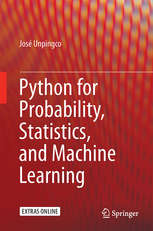

In [2]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [3]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from scipy import stats
import sympy as S

In [5]:
d=stats.bernoulli(.1).rvs((10,5000)).mean(0)
d=d[np.logical_not(np.isclose(d,1))]
# print mean(d),var(d)

In [6]:
print mean(d/(1-d)),var(d/(1-d))

0.124488095238 0.0186228105159


$$ \frac{p}{n(1-p)^3} $$

In [7]:
ev = lambda p:p/10/(1-p)**3
ev(.5)

0.4

In [8]:
S.var('n,p',positive=True)
(p/n*(1-p)**3).subs([(p,0.1),(n,10)])

0.00729000000000000

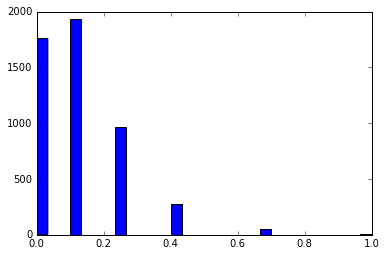

In [9]:
hist(d/(1-d),30,align='mid');

## sympy derivation

In [10]:
S.init_printing(use_latex=True)

In [11]:
x,p=S.symbols('x,p',real=True)
g = x/(1-x)

In [12]:
g.series(x=x,x0=p,n=3)
gs=g.series(x=x,x0=p,n=3).removeO().subs(x,x-p).subs(x,x/10)

In [13]:
from sympy.stats import E, Binomial
X = Binomial('X',10,p)

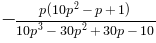

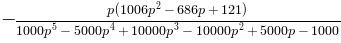

In [14]:
m =S.simplify(E(gs.subs(x,X)))
display(m)
v=S.simplify(E(gs.subs(x,X)**2)-m**2)
display(v)

In [15]:
print m.subs(p,.1),v.subs(p,.1)

0.0137174211248285 0.0105776558451456


In [16]:
print mean(d/(1-d)),var(d/(1-d))

0.124488095238 0.0186228105159


In [17]:
print (gs.subs(p,0.5))

0.4*x + 8.0*(x/10 - 1.0)**2 - 3.0


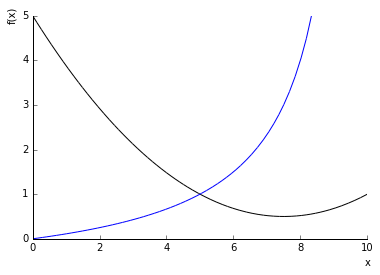

In [18]:
p1=S.plot(gs.subs(p,.5),(x,0,10),show=False,ylim=(0,5),line_color='k')
p2,=S.plot(g.subs(x,x/10),(x,0,10),ylim=(0,5),show=False)
p1.append(p2)
p1.show()

In [19]:
def gen_sample(p=0.1,nsamp=5000):
    d=stats.bernoulli(p).rvs((10,nsamp)).mean(axis=0)
    d=d[np.logical_not(np.isclose(d,1))]
    return mean(d),var(d)

In [20]:
# S.init_printing(use_latex=False)
gen_sample(.1)

In [21]:
# S.init_printing(use_latex=True)
print m.subs(p,0.5),v.subs(p,0.5)

1.20000000000000 0.472000000000000


In [22]:
def model(n=3):
    gs=g.series(x=x,x0=p,n=n).removeO().subs(x,x-p).subs(x,x/10)
    m =S.simplify(E(gs.subs(x,X)))
    v=S.simplify(E(gs.subs(x,X)**2)-m**2)
    return m,v

In [23]:
m,v = model(3)
print m.subs(p,0.1),v.subs(p,0.1)

0.0137174211248285 0.0105776558451456


In [24]:
g.series(x,x0=p,n=3)

         ⎛     p           1   ⎞           2 ⎛          p                  1  
(-p + x)⋅⎜──────────── + ──────⎟ + (-p + x) ⋅⎜───────────────────── + ────────
         ⎜ 2             -p + 1⎟             ⎜   3      2              2      
         ⎝p  - 2⋅p + 1         ⎠             ⎝- p  + 3⋅p  - 3⋅p + 1   p  - 2⋅p

    ⎞     p       ⎛        3       ⎞
────⎟ + ────── + O⎝(-p + x) ; x → p⎠
    ⎟   -p + 1                      
 + 1⎠                               